# Laden der Daten und Inspizieren der Daten (kopiert)

In [18]:
from PIL import Image
import numpy as np
import os
from pathlib import Path

no_flood_image_dir = Path("/home/aie3/christina/flood-area-segmentation/no_flood_images/Image")
no_flood_mask_dir = Path("/home/aie3/christina/flood-area-segmentation/no_flood_images/Mask")

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


In [ ]:
from PIL import Image, UnidentifiedImageError

IMG_HEIGHT, IMG_WIDTH = 224, 224

def load_images_and_masks_with_noflood():
    images, masks = [], []

    no_flood_files = sorted(os.listdir(no_flood_image_dir))
    for img_file in no_flood_files:
        img_path = no_flood_image_dir / img_file

        try:
            img = Image.open(img_path).resize((IMG_WIDTH, IMG_HEIGHT)).convert("RGB")
        except UnidentifiedImageError:
            print(f"File skipped (no valid image format): {img_file}")
            os.remove(img_path)
            continue

        empty_mask = np.zeros((IMG_HEIGHT, IMG_WIDTH), dtype=np.float32)

        # save mask
        # mask_img = Image.fromarray((empty_mask * 255).astype(np.uint8))
        # mask_img.save(no_flood_mask_dir / img_file)

        images.append(np.array(img) / 255.0)
        masks.append(empty_mask)

    return np.array(images), np.expand_dims(np.array(masks), axis=-1)

no_flood_images, no_flood_masks = load_images_and_masks_with_noflood()
print(f"Total images: {len(no_flood_images)} – Shape: {no_flood_images.shape}")

Total images: 14 – Shape: (14, 224, 224, 3)


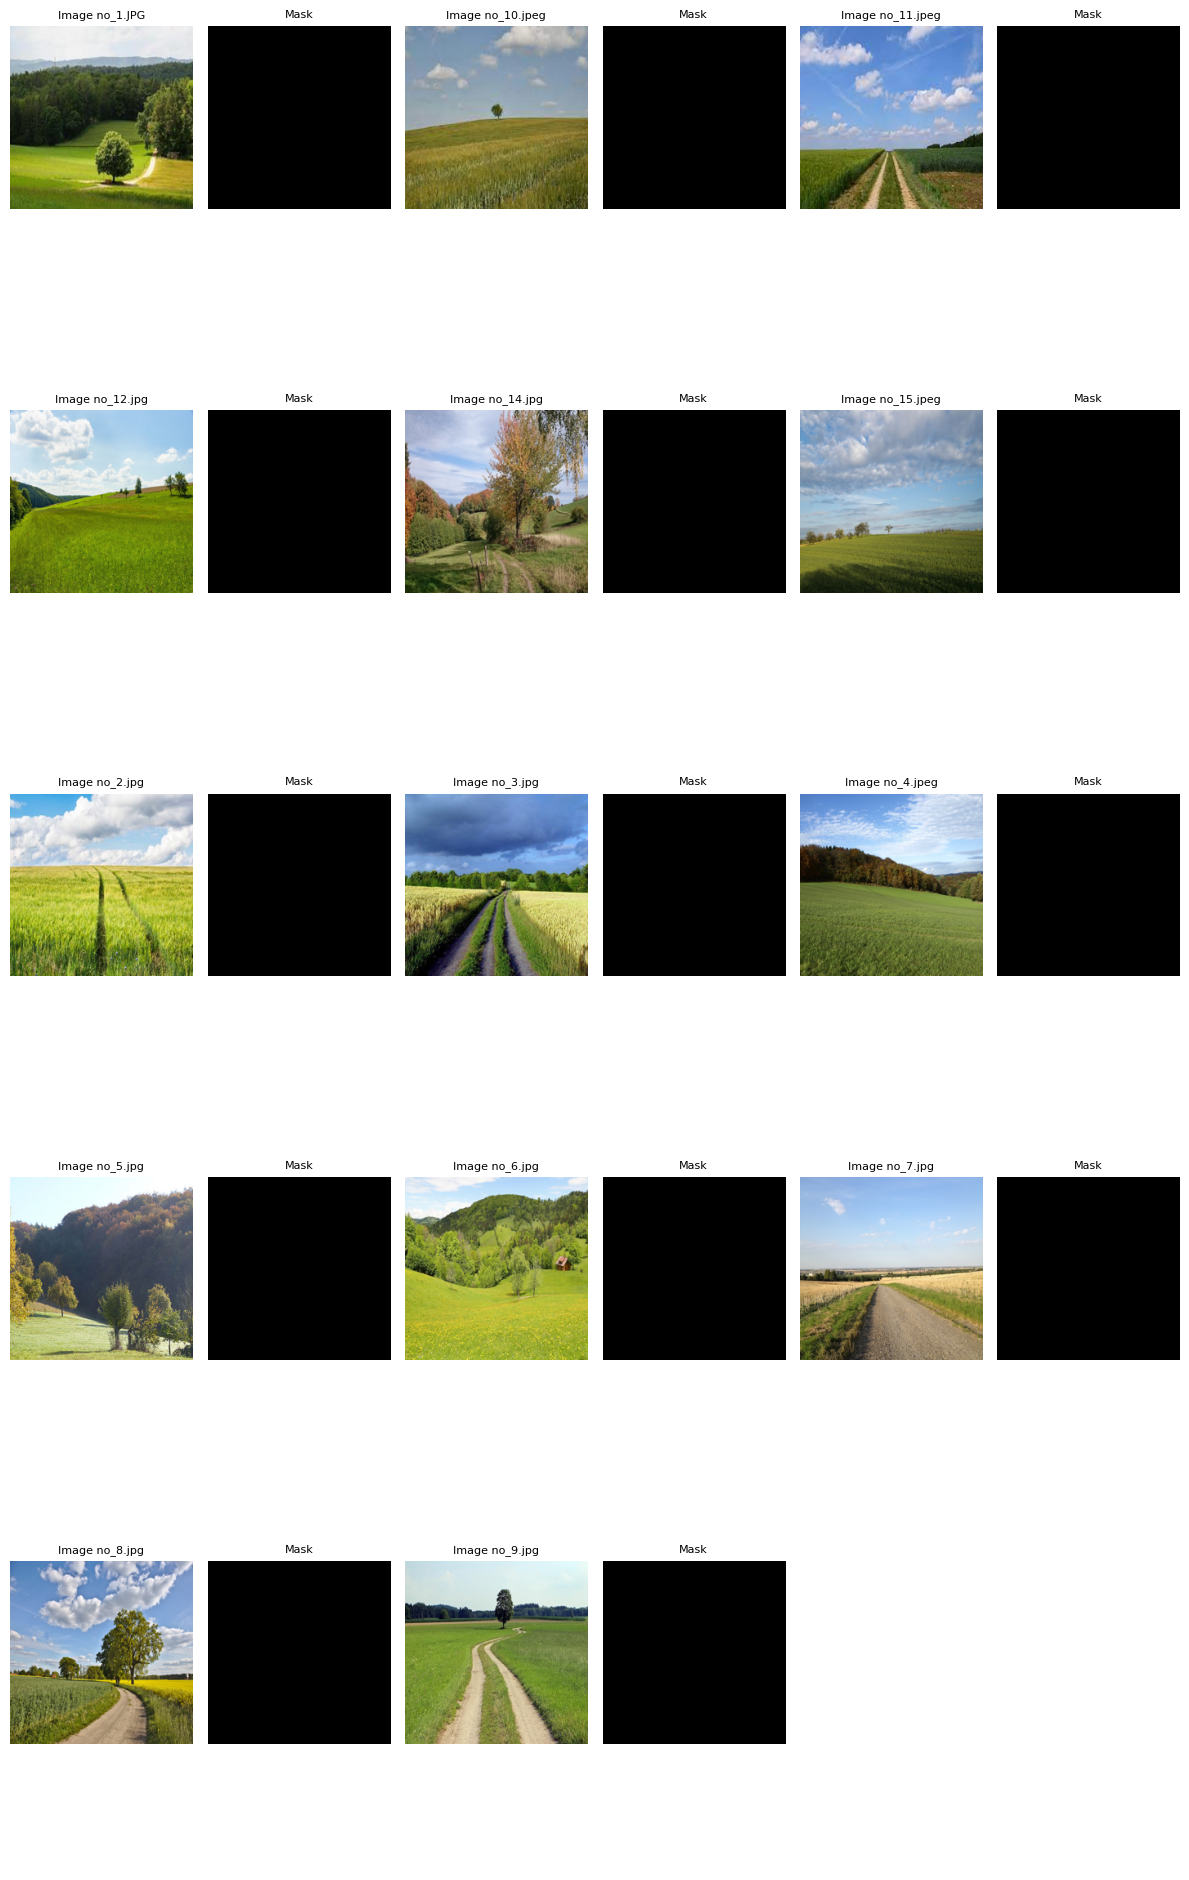

In [20]:
import matplotlib.pyplot as plt
from PIL import Image
import os
import math

def show_noflood_samples_with_masks(image_dir, mask_dir, per_row=3):
    image_files = sorted(os.listdir(image_dir))
    total_pairs = len(image_files)
    rows = math.ceil(total_pairs / per_row)

    fig, axs = plt.subplots(rows, per_row * 2, figsize=(per_row * 4, rows * 4))
    axs = axs.flatten()

    for idx, img_file in enumerate(image_files):
        img_path = os.path.join(image_dir, img_file)
        mask_path = os.path.join(mask_dir, img_file)

        try:
            img = Image.open(img_path).resize((IMG_WIDTH, IMG_HEIGHT))
            mask = Image.open(mask_path).resize((IMG_WIDTH, IMG_HEIGHT))
        except Exception as e:
            print(f"Problem with file {img_file}: {e}")
            continue

        i = idx * 2
        axs[i].imshow(img)
        axs[i].set_title(f"Image {img_file}", fontsize=8)
        axs[i].axis('off')

        axs[i+1].imshow(mask, cmap='gray')
        axs[i+1].set_title("Mask", fontsize=8)
        axs[i+1].axis('off')

    for j in range((total_pairs * 2), len(axs)):
        axs[j].axis('off')

    plt.tight_layout()
    plt.show()

show_noflood_samples_with_masks(
    image_dir="/home/aie3/christina/flood-area-segmentation/no_flood_images/Image",
    mask_dir="/home/aie3/christina/flood-area-segmentation/no_flood_images/Mask",
    per_row=3
)
